In [833]:
import numpy as np
from IPython.display import Audio

In [834]:
samplerate = 44100  # samples / sec
beat_len = 1/4  # sec

In [835]:
freq = 50 #150
amp =1  
t = np.linspace(0, beat_len, int(samplerate*beat_len))
note = amp*np.sin(freq * t * 2 * np.pi)
Audio(note, rate=samplerate)

In [836]:
bpm = 80 # beats / min
bps = bpm / 60 # beats / min * 1 min / 60 sec -> beat / sec
spb = 1 / bps
beat_samples = int(beat_len * samplerate)

In [837]:
pause_len = spb - beat_len  # sec
pause_samples = int(pause_len * samplerate)

In [838]:
assert pause_samples + beat_samples == samplerate * spb

In [839]:
def play_beat(beat_count):
    start = int(samplerate * spb * beat_count)
    end = samplerate * spb * (beat_count+1)
    sound_end = int(start + beat_samples)
    sound_slice = np.s_[start:sound_end]
    note = amp*np.sin(freq * t * 2 * np.pi)
    return sound_slice, note

In [840]:
num_beats = 4
song_len = int(num_beats * spb)
song = np.zeros(song_len * samplerate)

for b in range(4):
    s, n = play_beat(b)
    song[s] = n

In [841]:
Audio(song, rate=samplerate)

In [842]:
# https://www.cuidevices.com/blog/understanding-audio-frequency-range-in-audio-design
import torch
from collections import namedtuple

Note = namedtuple('Note', ['c', 'freq', 'amp', 'duration'])

NOTE_DURATION: 's' = .25

quiet = Note(c=0, freq=10, amp=0, duration=NOTE_DURATION) 
sub = Note(c=1, freq=30, amp=1, duration=NOTE_DURATION) 
bass = Note(c=2, freq=60, amp=1, duration=NOTE_DURATION) 
mid = Note(c=3, freq=250, amp=.2, duration=NOTE_DURATION) 
high = Note(c=4, freq=2000, amp=.005, duration=NOTE_DURATION) 


def play_note(note: Note, samplerate: 'sample / s'):
    samples_per_note: 'samples' = int(note.duration * samplerate)
    t = np.linspace(0, note_len, samples_per_note, dtype=np.float32)
    note = note.amp*np.sin(note.freq * t * 2 * np.pi, dtype=np.float32)
    sample_slice = np.s_[:samples_per_note]
    return sample_slice, note 
    

class BeatEmbed:
    
    samplerate: 'samples / s' = 44100
    bpm: 'beat / min' = 140
    
    def __init__(self, notes):
        self.samples_per_beat: 'samples' = int(self.spb * self.samplerate)
        self.vocab_size = len(notes)
        emb_table = np.zeros((self.vocab_size, self.emb_dim))
        for note in notes:
            sample_duration , sound = play_note(note, samplerate)
            emb_table[note.c, sample_duration] = sound
        
        self.emb_table = torch.Tensor(emb_table)
    
    @property
    def emb_dim(self):
        return self.samples_per_beat
    
    @property
    def bps(self) -> 'beat / sec':
        return self.bpm / 60
    
    @property
    def spb(self) -> 'sec / beat':
        return 1 / self.bps
        
    def __call__(self, c):
        return self.emb_table[c]

    
beat_embed = BeatEmbed([quiet, sub, bass, mid, high])

In [843]:
bars = 4
measure = ((high, sub), (high, sub), (high, bass), (high, ))
sequence = measure * bars
seq_len = len(sequence)
song = torch.zeros(seq_len, beat_embed.emb_dim)
for n, notes in enumerate(sequence):
    beat = torch.zeros(beat_embed.emb_dim)
    for note in notes:
        beat += beat_embed(note.c)
    song[n] = beat
song = song.flatten()

In [844]:
assert len(song) == beat_embed.samplerate * beat_embed.spb * seq_len

In [845]:
Audio(song.numpy(), rate=samplerate)

In [846]:
beats_per_cycle: "beats / cycle" = 5
beats_per_measure: "beats / measure" = 4
measure_samples: "samples / measure" = int(beat_embed.samplerate * beats_per_measure * beat_embed.spb)
def pos_emb(period=1):
    """
    16 beats / measure
    8 beats / measure
    4 beats / measure
    2 beats / measure
    1 beat / measure
    """
    measure = np.zeros(measure_samples)
    t = np.linspace(0, measure_samples, beat_embed.samplerate)
    return t, np.cos(period*2*np.pi/measure_samples*t)

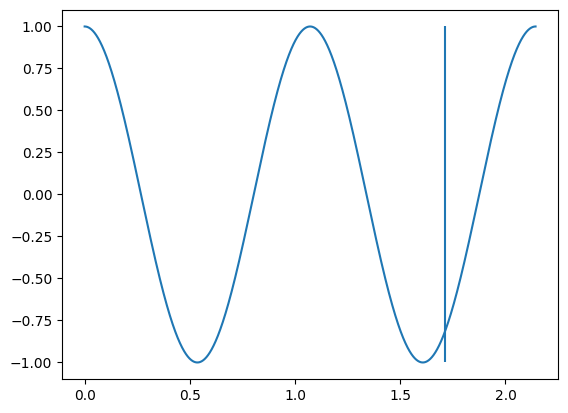

In [847]:
t, s = pos_emb(2)
t = np.linspace(0, 5*beat_embed.spb, beat_embed.samplerate)
plt.plot(t, s)
plt.vlines(4*beat_embed.spb, ymin=-1, ymax=1)

In [848]:
# https://theaisummer.com/self-attention/

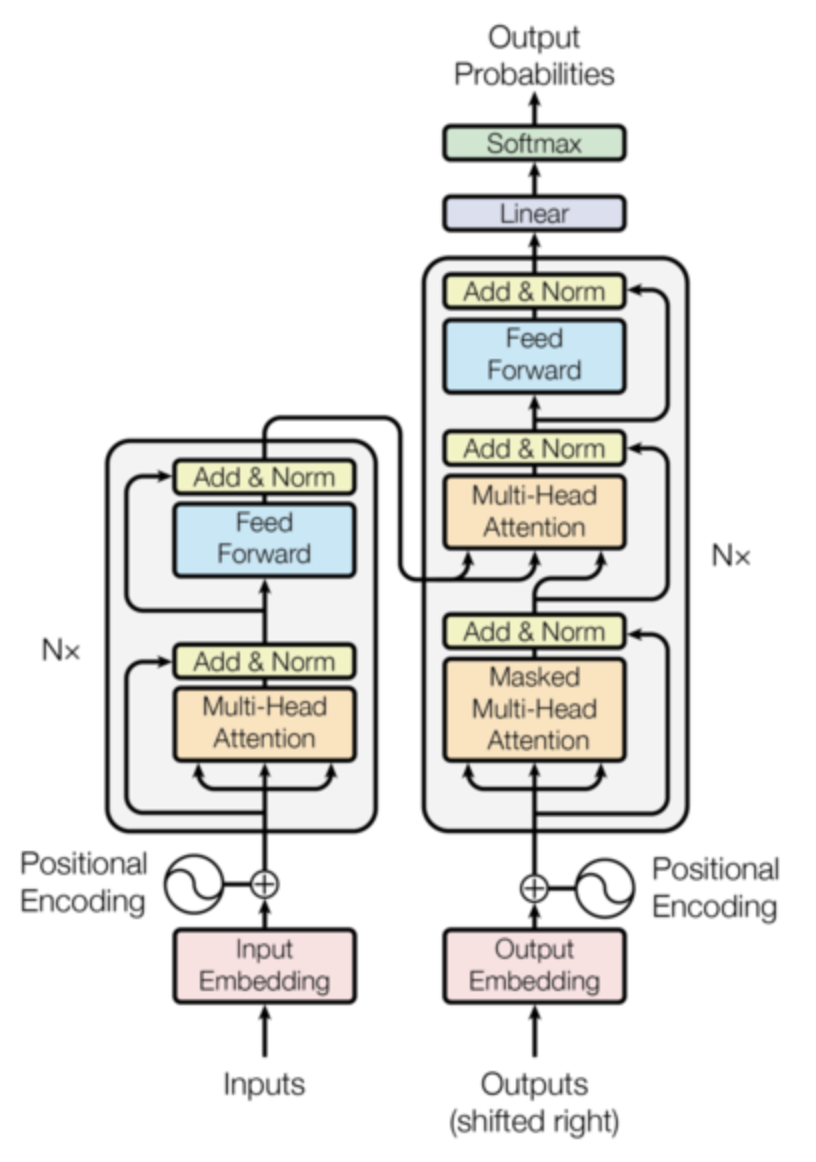

In [849]:
states = np.eye(6)

In [850]:
# states = states[:2]

In [851]:
obs = np.arange(1, 7)
OBS = np.diagflat(obs)

In [852]:
T = np.ones(shape=(6, 6))
T /= 6

In [853]:
# https://theaisummer.com/self-attention/
# https://stats.stackexchange.com/questions/515477/when-calculating-self-attention-for-transformer-ml-architectures-why-do-we-need
# https://davidvandebunte.gitlab.io/executable-notes/notes/se/what-exactly-are-keys-queries-and-values.html

In [854]:
(np.arange(1, 7)/6).sum()

3.5

$$
<o> = \sum o_i p_i
$$

$$
\left <X | W_Q W^T_K | x \right >  = \frac{X W_Q W^T_K X^T}{\sqrt{d_k}}
$$

$$
Y = {\rm Attention(Q, K, V)} = {\rm softmax} \left ( \frac{QK^T}{\sqrt{d_k}}\right ) V
$$

In [662]:
((states @ OBS @ T @ states.T) ).sum(0)

array([3.5, 3.5, 3.5, 3.5, 3.5, 3.5])

In [595]:
states[0]

array([1., 0., 0., 0., 0., 0.])

In [596]:
probs = np.ones(6)/6

In [421]:
(obs*probs).sum()

3.5

In [422]:
obs

array([1, 2, 3, 4, 5, 6])

e |s> = E |s>

In [626]:
obs = np.arange(1, 7)
OBS = np.diagflat(obs)

In [628]:
states @ OBS

array([[1., 0., 0., 0., 0., 0.],
       [0., 2., 0., 0., 0., 0.]])

In [570]:
T = np.ones(shape=(6, 6)) / 6

In [575]:
(states @ OBS )

array([[1., 0., 0., 0., 0., 0.],
       [0., 2., 0., 0., 0., 0.],
       [0., 0., 3., 0., 0., 0.],
       [0., 0., 0., 4., 0., 0.],
       [0., 0., 0., 0., 5., 0.],
       [0., 0., 0., 0., 0., 6.]])

In [442]:
(states @ OBS) 

array([[1., 0., 0., 0., 0., 0.],
       [0., 2., 0., 0., 0., 0.],
       [0., 0., 3., 0., 0., 0.],
       [0., 0., 0., 4., 0., 0.],
       [0., 0., 0., 0., 5., 0.],
       [0., 0., 0., 0., 0., 6.]])

In [663]:
(np.eye(2) @ np.asarray([[2, 3]]).T)

array([[2.],
       [3.]])

In [664]:
b = 1/np.sqrt(2) * np.asarray([[1, 1], [-1, 1]])

In [669]:
x = np.asarray([[2, 3], [0, 8]])

In [670]:
z = x @ b.T

In [671]:
e = np.eye(2)

array([[3.53553391, 0.70710678],
       [5.65685425, 5.65685425]])

In [688]:
e @ x @ e.T 

array([[2., 3.],
       [0., 8.]])

In [695]:
np.outer(e, e.T).shape

(4, 4)

array([[1., 0.],
       [0., 1.]])

In [673]:
b.shape

(2, 2)

In [674]:
x.shape

(2, 2)

In [675]:
z.T

array([[3.53553391, 5.65685425],
       [0.70710678, 5.65685425]])

In [676]:
-1 * b[0] + 5 * b[1]

array([-4.24264069,  2.82842712])

In [677]:
b

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

In [678]:
states

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

NameError: name 'sdf' is not defined

In [821]:
dim = 512
num_heads = 1
head_dim = dim // num_heads
seq=128
batch =1

W_q = torch.randn(size=(dim, dim))
W_k = torch.randn(size=(dim, dim))
W_v = torch.randn(size=(dim, dim))
x = torch.randn(size=(1, seq, dim))
B, N, C = x.shape

In [822]:
#Y = x @ W_q @ W_k.T @ x.T
#W = W_q @ W_k.T
#P = x @ W @ x.T
#
#np.testing.assert_allclose(Y, P, atol=.05)

In [823]:
x.transpose(-1, -2).shape

torch.Size([1, 512, 128])

In [824]:
W = W_q @ W_k.T
W.shape
# W_q = W
# W_k = W

torch.Size([512, 512])

In [825]:
Q = x @ W_q
K = x @ W_k
V = x @ W_v
Q_w = x @ W
K_w = W @ x.transpose(-2, -1)

In [826]:
Q.shape

torch.Size([1, 128, 512])

In [827]:
Q = Q.reshape(B, N, num_heads, C // num_heads)
K = K.reshape(B, N, num_heads, C // num_heads)
Q_w = Q_w.reshape(B, N, num_heads, C // num_heads)
K_w = K_w.reshape(B, N, num_heads, C // num_heads)
V = V.reshape(B, N, num_heads, C // num_heads)
Q.shape

torch.Size([1, 128, 1, 512])

In [828]:
Q = Q.permute(0, 2, 1, 3)
K = K.permute(0, 2, 1, 3)
Q_w = Q_w.permute(0, 2, 1, 3)
K_w = K_w.permute(0, 2, 1, 3)
V = V.permute(0, 2, 1, 3)

In [829]:
print(Q.shape)
print(Q_w.shape)

torch.Size([1, 1, 128, 512])
torch.Size([1, 1, 128, 512])


In [830]:
attn = (Q @ K.transpose(-2, -1))
attn_w = (Q_w @ K_w.transpose(-2, -1))

In [831]:
attn

tensor([[[[  4102.5273,   6196.1997,  16181.0527,  ...,  -1882.0713,
            10007.6602,  20380.7578],
          [  7219.6743,  -6802.3408,   5514.4712,  ...,  20437.6230,
            -1370.4895,  -4275.4653],
          [ -6356.0039,   1269.9404,   1625.0699,  ...,  19238.1426,
            -4752.0967,  16862.3809],
          ...,
          [-15033.8145,  25951.5078, -27246.8281,  ...,  23061.3555,
           -13869.4980,   2100.7773],
          [  1893.1072, -19506.1562,   6981.0557,  ...,  11555.7852,
             4974.3018,  11400.7773],
          [ -6865.8076, -14737.5400,  -4295.5420,  ...,   9443.3789,
            12387.3809, -28103.3477]]]])

In [832]:
attn_w

tensor([[[[  6596071.0000,  -4507837.5000,   2986751.2500,  ...,
              895366.8750,    -54858.6250,   5012751.0000],
          [ -8430557.0000,   5159379.5000,   5765734.0000,  ...,
            -4216069.5000,  -4479793.5000,  -2415068.7500],
          [ -1807879.0000,   3360517.7500,  -3109060.2500,  ...,
             5571318.0000,  -6652474.0000,   6184864.5000],
          ...,
          [   857168.0000,   8502036.0000,   1215258.0000,  ...,
            12688441.0000,   1968868.0000,    158278.0000],
          [  4753603.5000, -12429257.0000,   6462197.0000,  ...,
             4862872.0000,  -6746760.0000,   -116251.1406],
          [ -3086042.0000,   9107331.0000,  -4428921.5000,  ...,
            -3940051.5000,  -2581589.0000, -10917808.0000]]]])

torch.Size([1, 1, 128, 128])

In [779]:
# old_attn = attn

In [802]:
attn

tensor([[[[ -1134.5662, -16622.5527,   2033.7148,  ..., -10251.2002,
           -11856.4619,  13854.9648],
          [  3283.9221, -37292.7969,  18886.0117,  ...,   2525.3208,
            -3584.1431, -13088.8555],
          [ 14042.8936,  16499.2109,   6363.2871,  ...,  20066.6172,
            15179.7480, -16845.7852],
          ...,
          [-18786.9609,  12542.7051,  12843.8486,  ...,   5607.0723,
            19990.6191,  -5414.0054],
          [  2029.8181,  10140.0469,  -2795.7036,  ...,  11134.6309,
             8330.5146, -21771.8789],
          [ -3012.8525,   2588.8447,  -1456.7046,  ...,  -6532.4434,
             5754.5806,   5635.4028]]]])

In [803]:
old_attn

tensor([[[[-3.1290e+03,  1.8650e+03, -2.3900e+03,  ..., -2.1248e+03,
            1.8307e+03,  4.2705e+03],
          [ 2.8744e+02,  3.2922e+03, -2.2955e+03,  ...,  8.8876e+01,
            3.6370e+03, -5.1900e+03],
          [ 1.6176e+03,  4.0462e+03, -6.3840e+03,  ..., -1.6067e+03,
            4.8329e+03,  2.4565e+03],
          ...,
          [-3.0464e+03, -2.4829e+03,  2.0930e+03,  ..., -3.7765e+03,
            5.0908e+03, -8.8618e+03],
          [-1.5280e+03,  3.8035e+03, -3.7262e+03,  ...,  4.0368e+03,
           -5.5415e+00,  3.0268e+03],
          [ 5.4619e+03,  7.7182e+02, -3.4700e+03,  ...,  2.9147e+02,
            3.3066e+03, -3.5109e+03]],

         [[ 3.1890e+03,  3.0321e+02, -6.8592e+03,  ...,  2.4969e+03,
            7.1354e+02, -4.3222e+03],
          [ 4.6827e+03,  2.4321e+03, -1.1284e+03,  ...,  3.5661e+03,
           -5.8372e+03, -4.4597e+03],
          [-4.7730e+03,  2.1063e+03,  5.8313e+02,  ..., -2.4466e+03,
            4.3519e+03,  2.5401e+03],
          ...,
     